## 데이터 크기 확인

In [1]:
import os


def convert_bytes(file_path, unit=None):
  size = os.path.getsize(file_path)
  if unit == "KB":
    return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
  elif unit == "MB":
    return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
  elif unit == "GB":
    return print('File size: ' + str(round(size / (1024 * 1024 * 1024), 3)) + ' Gigabytes')
  else:
    return print('File size: ' + str(size) + ' bytes')


file_list = ['new-york-city-taxi-fare-prediction/train.csv',
             'new-york-city-taxi-fare-prediction/test.csv',
             'new-york-city-taxi-fare-prediction/sample_submission.csv']
for file in file_list:
  print("The {file} size: ".format(file=file))
  convert_bytes(file)
  convert_bytes(file, 'KB')
  convert_bytes(file, 'MB')
  convert_bytes(file, 'GB')
  print("--" * 5)


The new-york-city-taxi-fare-prediction/train.csv size: 
File size: 5697178298 bytes
File size: 5563650.682 Kilobytes
File size: 5433.253 Megabytes
File size: 5.306 Gigabytes
----------
The new-york-city-taxi-fare-prediction/test.csv size: 
File size: 983020 bytes
File size: 959.98 Kilobytes
File size: 0.937 Megabytes
File size: 0.001 Gigabytes
----------
The new-york-city-taxi-fare-prediction/sample_submission.csv size: 
File size: 343271 bytes
File size: 335.226 Kilobytes
File size: 0.327 Megabytes
File size: 0.0 Gigabytes
----------


## 라이브러리 및 데이터 로드

In [ ]:
train.info()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def skip_logic(index, skip_num):
    if index % skip_num == 0:
        return False
    return True


train = pd.read_csv('new-york-city-taxi-fare-prediction/train.csv', skiprows=lambda x: skip_logic(x,
                    4), parse_dates=["pickup_datetime"])
print(train.shape)
test = pd.read_csv('new-york-city-taxi-fare-prediction/test.csv')
submission = pd.read_csv('new-york-city-taxi-fare-prediction/sample_submission.csv')


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13855964 entries, 0 to 13855963
Data columns (total 8 columns):
 #   Column             Dtype              
---  ------             -----              
 0   key                object             
 1   fare_amount        float64            
 2   pickup_datetime    datetime64[ns, UTC]
 3   pickup_longitude   float64            
 4   pickup_latitude    float64            
 5   dropoff_longitude  float64            
 6   dropoff_latitude   float64            
 7   passenger_count    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 845.7+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


- 두 데이터를 비교해보면 Fare_Amount가 테스트 데이터에 없는 것을 확인할 수 있음
- 종속 변수로 추정

In [ ]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
1,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1
2,2012-12-24 11:24:00.00000098,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3
3,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00+00:00,0.000000,0.000000,0.000000,0.000000,1
4,2014-12-06 20:36:22.0000008,4.0,2014-12-06 20:36:22+00:00,-73.979815,40.751902,-73.979446,40.755481,1


In [ ]:
# Fare_Amount의 최댓값과 최솟값 구하기
print('Minimum Value of train:', train['fare_amount'].min())
print('Maximum Value of train:', train['fare_amount'].max())

Minimum Value of train: -300.0
Maximum Value of train: 93963.36


- -300이 나와 이해하기 어려워짐

In [ ]:
print('Fare Amount<0:', sum(train['fare_amount']<0))
print('Fare Amount>0:', sum(train['fare_amount']>0))

Fare Amount<0: 610
Fare Amount>0: 13855007


In [ ]:
from collections import Counter
Counter(train['fare_amount']<0)

Counter({False: 13855354, True: 610})

- 총 610개의 음수 데이터가 있는 것을 알 수 있음(삭제할 예정)

In [ ]:
train = train.drop(train[train['fare_amount']<0].index, axis=0).reset_index(drop=True)
Counter(train['fare_amount']<0)

Counter({False: 13855354})

In [ ]:
# 극단적인 데이터 제거
Counter(train['fare_amount']>500)

train = train.drop(train[train['fare_amount'] > 500].index,
                   axis=0).reset_index(drop=True)
print('Minimum Value of train:', train['fare_amount'].min())
print('Maximum Value of train:', train['fare_amount'].max())

Minimum Value of train: 0.0
Maximum Value of train: 500.0


 #### 데이터가 너무 크므로 층화 추출 샘플링을 사용해 표본의 크기를 줄임


In [ ]:
train['passenger_count'].unique()

array([  1,   3,   6,   2,   5,   4,   0, 208, 129,  51,   8,   9],
      dtype=int64)

- 0명인데 비용이 나온 것과 51명, 129명, 208명은 너무 많다 생각됨 
- 6명 이상과 0명은 삭제하는 것이 좋을 것으로 판단

In [ ]:
train = train.drop(train[train['passenger_count']>6].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['passenger_count']==0].index, axis=0).reset_index(drop=True)
train['passenger_count'].unique()

array([1, 3, 6, 2, 5, 4], dtype=int64)

In [ ]:
# passenger_count의 비율 확인
train['passenger_count'].value_counts(normalize=True)

1    0.693959
2    0.148144
5    0.071225
3    0.044029
4    0.021383
6    0.021260
Name: passenger_count, dtype: float64

- 1명 탑승한 택시 승객의 비율이 약 70퍼에 해당하는 것을 확인

In [ ]:
# StratifiedShuf-fleSplit 모듈을 사용해 층화 추출
from sklearn.model_selection import StratifiedShuffleSplit

sample = pd.DataFrame({'group': np.repeat(['A', 'B', 'C'], (60, 40, 20)),
                        'sample_value': np.random.randn(120)})
split = StratifiedShuffleSplit(n_splits=1, test_size=0.7, random_state=42)

for train_index, test_index in split.split(sample, sample['group']):
    strata_train_set = sample.loc[train_index]
    test_set = sample.loc[test_index]

print(sample['group'].value_counts(normalize=True))
print(sample.shape)
print(strata_train_set['group'].value_counts(normalize=True))
print(strata_train_set.shape)

A    0.500000
B    0.333333
C    0.166667
Name: group, dtype: float64
(120, 2)
A    0.500000
B    0.333333
C    0.166667
Name: group, dtype: float64
(36, 2)


- 위 결과값으로 변수 그룹 내 A, B, C이 동일한 비율로 표본이 추출된 것을 확인할 수 있음

In [ ]:
# 본 데이터에 적용
split = StratifiedShuffleSplit(n_splits=1, test_size=0.001, random_state=42)

for large_index, sample_index in split.split(train, train['passenger_count']):
    large_df = train.loc[large_index]
    sample_df = train.loc[sample_index]

print('train:\n', train['passenger_count'].value_counts(normalize=True), train.shape)
print('sample:\n', sample_df['passenger_count'].value_counts(normalize=True), sample_df.shape)


train:
 1    0.693959
2    0.148144
5    0.071225
3    0.044029
4    0.021383
6    0.021260
Name: passenger_count, dtype: float64 (13806160, 8)
sample:
 1    0.693996
2    0.148113
5    0.071196
3    0.044036
4    0.021366
6    0.021294
Name: passenger_count, dtype: float64 (13807, 8)


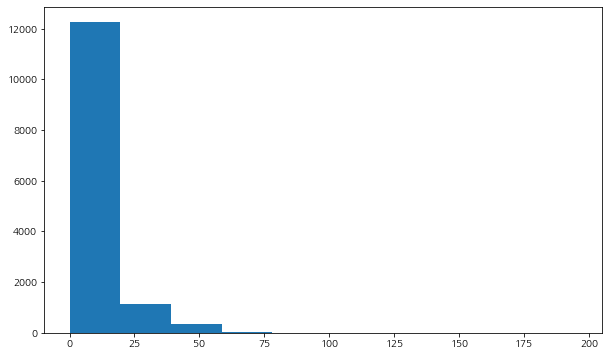

In [ ]:
# 시각화
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(sample_df['fare_amount'])
plt.show()

#### 로그 변환
- 위도의 범위 -90 ~ 90
- 경도의 범위 -180 ~ 180
- 위 범위를 벗어나는 값이 있다면 제거

In [ ]:
# 실제 데이터가 있는지 확인

Counter(train['pickup_latitude'] < -90) # -90보다 작은 데이터

Counter({False: 13806091, True: 69})

In [ ]:
Counter(train['pickup_latitude'] > 90)  # 90보다 큰 데이터


Counter({False: 13805984, True: 176})

- -90보다 작은 데이터 69개와 90보다 큰 데이터 176개가 있는 것을 확인
- 위 데이터들을 삭제시킬겁니다.

In [ ]:
train = train.drop(train[train['pickup_latitude'] < -90].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['pickup_latitude'] > 90].index, axis=0).reset_index(drop=True)
Counter(train['pickup_latitude'] > 90)

Counter({False: 13805915})

In [ ]:
train = train.drop(train[train['dropoff_latitude'] < -90].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['dropoff_latitude'] > 90].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['pickup_longitude'] < -180].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['pickup_longitude'] > 180].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['dropoff_latitude'] < -180].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['dropoff_latitude'] > 180].index, axis=0).reset_index(drop=True)
train.shape

(13805588, 8)

#### key, pickup_datetime이 날짜 데이터로 기록되는지 확인

In [ ]:
# 우선 key 변수 확인
train.iloc[:3, 0]

0     2012-04-21 04:30:42.0000001
1    2012-01-04 17:22:00.00000081
2    2012-12-24 11:24:00.00000098
Name: key, dtype: object

In [ ]:
train.iloc[:3, 2]

0   2012-04-21 04:30:42+00:00
1   2012-01-04 17:22:00+00:00
2   2012-12-24 11:24:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

#### 위도와 경도이 이상치를 제거한 후, 층화 추출을 활용해 sample 데이터만 추출하여 시각화 구현


In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.001, random_state=42)

for large_index, sample_index in split.split(train, train['passenger_count']):
  large_df = train.loc[large_index]
  sample_df = train.loc[sample_index]


In [ ]:
'''
함수는 필터링 기능을 사용
차량을 탑승한 위치의 위도와 경도, 하차한 위치의 위도와 경도를 표시
근데 표시한 지도 외에 데이터가 이상치로 존재하면 삭제하는 코드 (일종의 전처리 코드)
'''
Bounding_Box = (-74.5, -72.8, 40.5, 41.8)


def select_within_boundingbox(data, BB):
    return (data.pickup_longitude >= BB[0]) & (data.pickup_longitude <= BB[1]) & \
           (data.pickup_latitude >= BB[2]) & (data.pickup_latitude <= BB[3]) & \
           (data.dropoff_longitude >= BB[0]) & (data.dropoff_longitude <= BB[1]) & \
           (data.dropoff_latitude >= BB[2]) & (data.dropoff_latitude <= BB[3])


print('Old size: %d' % len(sample_df))
sample_df = sample_df[select_within_boundingbox(sample_df, Bounding_Box)]
print('New size: %d' % len(sample_df))


Old size: 13806
New size: 13494


In [ ]:
print('Old size: %d'%len(sample_df))
sample_df = sample_df[select_within_boundingbox(sample_df, Bounding_Box)]
print('New size: %d'%len(sample_df))

Old size: 13494
New size: 13494


### 뉴욕 지도 시각화
- 현재 에러로 사진을 못가져옴

In [ ]:
# 뉴욕의 지도만 출력
# import ssl
# from urllib.request import urlopen
# context = ssl._create_unverified_context()

# load image of NYC map
# Bounding_Box = (-74.5, -72.8, 40.5, 41.8)
# NYC_MAP_img_path = 'https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png'
# NYC_MAP = urlopen(NYC_MAP_img_path, context=context)
# nyc_map = plt.imread(NYC_MAP)

# load extra image to zoom in on NYC
# Bounding_Box_Zoom = (-74.3, -73.7, 40.5, 40.9)
# NYC_MAP_ZOOM_img_path = 'https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png'
# NYC_MAP_ZOOM = urlopen(NYC_MAP_img_path, context=context)
# nyc_map_zoom = plt.imread(NYC_MAP_ZOOM)

# fig, ax = plt.subplots(1, 2, figsize=(16, 10))
# ax[0].imshow(nyc_map, zorder=0, extent=Bounding_Box)
# ax[0].set_title("NY Map")

# ax[1].imshow(nyc_map_zoom, zorder=0, extent=Bounding_Box_Zoom)
# ax[1].set_title("NY Map Zoom")

# plt.imshow()
